This notebook is an implementation of training a Face Detection model on Yolov5

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ClearML Integration

In [ ]:
!pip install git+https://github.com/allegroai/clearml
!pip install clearml-agent
! export MPLBACKEND=TkAg

from clearml import Task
Task.set_credentials(
     api_host="https://api.clear.ml", 
     web_host="https://app.clear.ml", 
     files_host="https://files.clear.ml", 
     key='DPSDPEAC3JDK4DR1SRFF', 
     secret='uIBqLSdNaRWiXTfvIsUKjLNTxelHuXcni0s9TFCDZ1ho5w50fv'
)

!clearml-agent daemon --queue default

In [ ]:
!pip install git+https://github.com/allegroai/clearml
!pip install clearml-agent

In [ ]:
! export MPLBACKEND=TkAg

# Cloning Github Repository

In [ ]:
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15393, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 15393 (delta 9), reused 17 (delta 6), pack-reused 15369
Receiving objects: 100% (15393/15393), 14.37 MiB | 13.40 MiB/s, done.
Resolving deltas: 100% (10522/10522), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


# Training Yolov5 Model

In [ ]:
%%time
!python /content/yolov5/train.py --img 640 --batch 32 --epochs 100 --data /content/drive/MyDrive/FaceDetectionOurData/data.yaml --weights yolov5s.pt --optimizer 'Adam'

2023-04-03 22:29:16.711873: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 22:29:17.626623: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/FaceDetectionOurData/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, 

# Validation

In [ ]:
!python val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data /content/drive/MyDrive/FaceDetectionOurData/data.yaml

val: data=/content/drive/MyDrive/FaceDetectionOurData/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-133-gcca5e21 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/FaceDetectionOurData/valid/labels.cache... 128 images, 0 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:19<00:00,  4.93s/it]
                   all        128       3543      0.979      0.981      0.992      0.669
Speed: 0.5ms pre-process, 9.3ms inference, 13.6ms N

# Testing

In [ ]:
%%time
!python detect.py --weights /content/BESTNEW.pt --img 640 --conf 0.4 --source '/content/drive/MyDrive/FaceDetectionOurData/test/images/*.jpg' --data /content/drive/MyDrive/FaceDetectionOurData/data.yaml 

detect: weights=['/content/yolov5/BESTNEW.pt'], source=/content/drive/MyDrive/FaceDetectionOurData/test/images/*.jpg, data=/content/drive/MyDrive/FaceDetectionOurData/data.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/111 /content/drive/MyDrive/FaceDetectionOurData/test/images/vid1frame10800_png.rf.d62820e4ab38dd6cd27e09ae4747548d.jpg: 640x640 27 faces, 11.5ms
image 2/111 /content/drive/MyDrive/FaceDetectionOurData/test/images/vid1frame14400_png.rf.4333cf7f0fa605d9c78001fb66c0d3f0.j

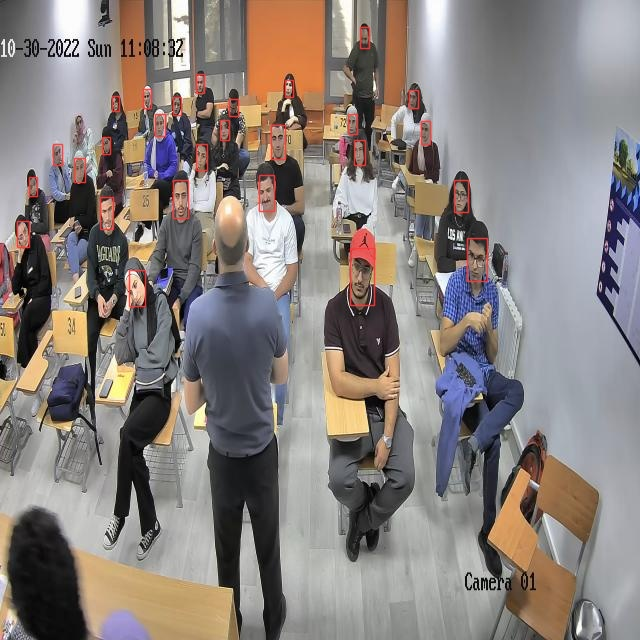

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/yolov5/runs/detect/exp2/vid1frame10800_png.rf.d62820e4ab38dd6cd27e09ae4747548d.jpg')
cv2_imshow(img)

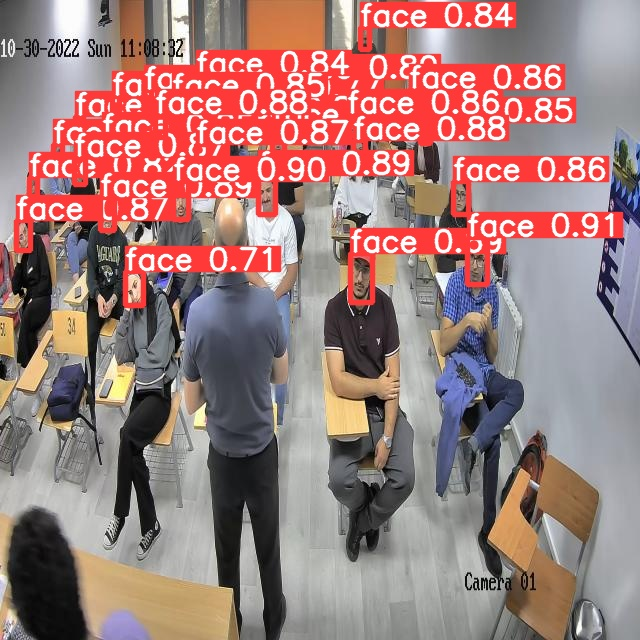

In [ ]:
img = cv2.imread('/content/yolov5/runs/detect/exp2/vid1frame10800_png.rf.d62820e4ab38dd6cd27e09ae4747548d.jpg')
cv2_imshow(img)

# Cropping Faces

In [ ]:
import shutil

In [ ]:
#Saving Crops of Testing Dataset
!python detect.py --weights /content/BESTNEW.pt --img 640 --conf 0.4 --source '/content/drive/MyDrive/FaceDetectionOurData/test/images/*.jpg' --data /content/drive/MyDrive/FaceDetectionOurData/data.yaml --save-crop

#Saving Directory of cropped faces
source_directory = '/content/yolov5/runs/detect/exp/crops/face'
destination_directory = '/content/drive/MyDrive/TestingCropped'
shutil.copytree(source_directory, destination_directory)

In [ ]:
#Saving Crops of Training Dataset
!python detect.py --weights /content/BESTNEW.pt --img 640 --conf 0.4 --source '/content/drive/MyDrive/FaceDetectionOurData/train/images/*.jpg' --data /content/drive/MyDrive/FaceDetectionOurData/data.yaml --save-crop

#Saving Directory of cropped faces
source_directory = '/content/yolov5/runs/detect/exp2/crops/face'
destination_directory = '/content/drive/MyDrive/TrainingCropped'
shutil.copytree(source_directory, destination_directory)

In [ ]:
#Saving Crops of Validation Dataset
!python detect.py --weights /content/BESTNEW.pt --img 640 --conf 0.4 --source '/content/drive/MyDrive/FaceDetectionOurData/valid/images/*.jpg' --data /content/drive/MyDrive/FaceDetectionOurData/data.yaml --save-crop

#Saving Directory of cropped faces
source_directory = '/content/yolov5/runs/detect/exp3/crops/face'
destination_directory = '/content/drive/MyDrive/ValidationCropped'
shutil.copytree(source_directory, destination_directory)